# Mass Spring Damper Systems

An square matrix, $P \in \mathbb{R}^{n\times n}$,  such that $\vec{x}^T P \vec{x} > 0$ for all $\vec{x} \in \mathbb{R}^n$ is called **positive definite**.

A matrix is **positive definite** if and only if:

1. The matrix is **Hermitian** (self-adjoint).
    * **Hermitian** $P=\bar{P}^T$, where $\bar{P}^T$ is often denoted as $P^*$
    * This can be thought of the extension of *symmetric* to complex matrices. A Hermitian matrix is garunteed to have *real* eigenvalues.
2. The matrix is **diagonally dominant** with a **positive diagonal**.
    * A diagonally dominant matrix will have eigen values with positive real part if the diagonal is positive.
    * If the diagonal is negative, it will have eigenvalues with negative real part.
3. The matrix is invertible.

**Question 1**

Is the matrix $\begin{bmatrix}
-1 & 0 \\
0 & 2
\end{bmatrix}$ positive definite?

**Question 2**

Is the matrix $\begin{bmatrix}
2 & 1 \\
1 & 3
\end{bmatrix}$ positive definite?

**Question 3**

Show that the matrix: $\begin{bmatrix}
1 & 1 \\
1 & 1
\end{bmatrix}$ is not positive definite.

In [1]:
import numpy as np
A = np.array([
    [1, 3],
    [0, 2]
], dtype=np.float)
np.linalg.eig(A)

x = np.array([[2], [-1]], dtype=np.float)
x.T.dot(A).dot(x)

array([[0.]])

In [2]:
import sympy
sympy.init_printing()
x = sympy.Matrix(sympy.symbols('x_0:2'))
x

⎡x₀⎤
⎢  ⎥
⎣x₁⎦

In [3]:
A = sympy.Matrix(sympy.symbols('A_0:4')).reshape(2, 2)
A

⎡A₀  A₁⎤
⎢      ⎥
⎣A₂  A₃⎦

In [4]:
(x.T*A*x)[0].expand().collect(x[0]*x[1])

In [5]:
m1 = 1
m2 = 2
c1 = 3
c2 = 4
k1 = 6
k2 = 5
k3 = 7

M = sympy.Matrix([
    [m1, 0],
    [0, m2]
])
MI = M.inv()

Phi = sympy.Matrix([
    [c1+c2, -c2],
    [-c2, c2]
])

K = sympy.Matrix([
    [k1 + k2, -k2],
    [-k2, k2 + k3]
])
M, Phi, K

⎛⎡1  0⎤  ⎡7   -4⎤  ⎡11  -5⎤⎞
⎜⎢    ⎥, ⎢      ⎥, ⎢      ⎥⎟
⎝⎣0  2⎦  ⎣-4  4 ⎦  ⎣-5  12⎦⎠

In [6]:
Z = sympy.zeros(2, 2)
I = sympy.eye(2)
M = sympy.Matrix(M).inv()
A = sympy.Matrix.vstack(
    sympy.Matrix.hstack(Z, I),
    sympy.Matrix.hstack(-MI*K, -MI*Phi)
)
B = sympy.Matrix.vstack(Z, MI)
C = sympy.Matrix.hstack(I, Z)
D = Z
s = sympy.symbols('s')
(s*sympy.eye(4) - A).det()

In [7]:
import control
sys = control.ss(A, B, C, D)
sys

A = [[0 0 1 0]
 [0 0 0 1]
 [-11 5 -7 4]
 [5/2 -6 2 -2]]

B = [[0 0]
 [0 0]
 [1 0]
 [0 1/2]]

C = [[1 0 0 0]
 [0 1 0 0]]

D = [[0 0]
 [0 0]]

In [8]:
G = control.ss2tf(sys)
G


Input 1 to output 1:
          s^2 + 2 s + 6
----------------------------------
s^4 + 9 s^3 + 23 s^2 + 44 s + 53.5

Input 1 to output 2:
            2 s + 2.5
----------------------------------
s^4 + 9 s^3 + 23 s^2 + 44 s + 53.5

Input 2 to output 1:
            2 s + 2.5
----------------------------------
s^4 + 9 s^3 + 23 s^2 + 44 s + 53.5

Input 2 to output 2:
      0.5 s^2 + 3.5 s + 5.5
----------------------------------
s^4 + 9 s^3 + 23 s^2 + 44 s + 53.5

U = 1/s

Y = GU

$y(\infty) = \lim_{s \rightarrow 0} s Y(s)$ 

In [9]:
G


Input 1 to output 1:
          s^2 + 2 s + 6
----------------------------------
s^4 + 9 s^3 + 23 s^2 + 44 s + 53.5

Input 1 to output 2:
            2 s + 2.5
----------------------------------
s^4 + 9 s^3 + 23 s^2 + 44 s + 53.5

Input 2 to output 1:
            2 s + 2.5
----------------------------------
s^4 + 9 s^3 + 23 s^2 + 44 s + 53.5

Input 2 to output 2:
      0.5 s^2 + 3.5 s + 5.5
----------------------------------
s^4 + 9 s^3 + 23 s^2 + 44 s + 53.5

In [10]:
G[0, 1]


            2 s + 2.5
----------------------------------
s^4 + 9 s^3 + 23 s^2 + 44 s + 53.5

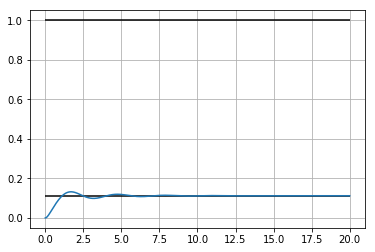

In [11]:
import matplotlib.pyplot as plt
t, y = control.step_response(G[0, 0], T=np.linspace(0, 20, 1000))
plt.plot(t, y)
plt.hlines(1, 0, 20)
plt.hlines(6/53.5, t[0], t[-1])
plt.grid()

In [12]:
A = np.array([[1, -1], [-1, 1]])
np.linalg.eig(A)

(array([2., 0.]), array([[ 0.70710678,  0.70710678],
        [-0.70710678,  0.70710678]]))